###IBM HR Analytics Employee Attrition & Performance - Kaggle

Este conjunto de dados foi criado pela equipe de cientistas de dados da IBM com o objetivo de ser usado de maneira educacional. Iremos criar uma variável chamada de turnover (rotatividade) para ser usada como variável dependente. Esta variável demonstra que o funcionário poderá sair da empresa.

##Sobre este projeto

Os principais pontos que serão avaliados:
 - Levantamento de hipóteses
 - Manipulação de dados e criação de gráficos simples com o Pandas
 - Criar um modelo de classificação

##Preparação do ambiente

 - Para este projeto, acessem o link - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
 - Crie a variável **turnover seguindo os passos abaixo:

`dados['turnover'] = dados.replace({'Attrition': {'Yes':1, 'No': 0}})`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.DataFrame(dados)
df['turnover'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##Exercicio 1. (2 pontos)

Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.

Primeiramente irei fazer uma divisão entre os grupos turnover 1 e 0 para fazer a comparação das variáveis entre os grupos.

In [ ]:
turnover0 = df[df['turnover'] == 0]
turnover1 = df[df['turnover'] == 1]

print(f'Quantidade de funcionários que não sairam da empresa: {turnover0.shape[0]}')
print(f'Quantidade de funcionários que sairam da empresa: {turnover1.shape[0]}')
print(f'Média de idade dos funcionários que não sairam da empresa: {turnover0["Age"].mean():.2f}')
print(f'Média de idade dos funcionários que sairam da empresa: {turnover1["Age"].mean():.2f}')
print("Percentual de aumento salarial")
print("Não sairam da empresa")
print(turnover0['PercentSalaryHike'].value_counts())
print('-'*30)
print("Sairam da empresa")
print(turnover1['PercentSalaryHike'].value_counts())

Quantidade de funcionários que não sairam da empresa: 1233
Quantidade de funcionários que sairam da empresa: 237
Média de idade dos funcionários que não sairam da empresa: 37.56
Média de idade dos funcionários que sairam da empresa: 33.61
Percentual de aumento salarial
Não sairam da empresa
14    177
13    175
11    169
12    165
15     83
18     76
17     68
19     67
16     64
20     48
22     44
21     43
23     22
25     17
24     15
Name: PercentSalaryHike, dtype: int64
------------------------------
Sairam da empresa
11    41
13    34
12    33
14    24
15    18
16    14
17    14
18    13
22    12
19     9
20     7
23     6
24     6
21     5
25     1
Name: PercentSalaryHike, dtype: int64


O percentual de aumento de salário mostra que existe uma tendencia de saída para os funcionários que tiveram ajustes entre 11 e 18 porcento e que os que tiveram maior aumento estão mais propensos a continuarem na empresa.

In [ ]:
turnover0.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.0
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.0
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.0
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.0
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,0.0


In [ ]:
turnover1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,1.0
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,0.0
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.0
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000,1.0
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,1.0


Acima temos a descrição de algumas metricas dos dois grupos, levando como base a media de algumas váriaveis pode-se intuir que:
 - Houve uma saída de funcionários com o nivel de trabalho menor (JobLevel), ou seja aqueles que tem cargos mais elevados tendem a permanecer na empresa;
 - Os funcionários com renda mensal menor (MonthlyIncome) e com menor nivel nas tomas de decisão (StockOptionLevel) tendem a sairem da empresa, dando força a hipotese de que quanto menor no nivel de trabalho (JobLevel) somada com essas duas variveis cominam com o desligamento do colaborador;
 - Por outro lado os que tem niveis de trabalho maior tem tendencia a ficar mais tempo na empresa como mostra as variaveis total de anos de trabalho (TotalWorkingYears), anos na empresa (YearsAtCompany) e anos na atual função (YearsInCurrentRole).

Abaixo um mapa de calor com as correlações entre as variaveis e uma forma visual de demostrar as analises realizadas anteriores.

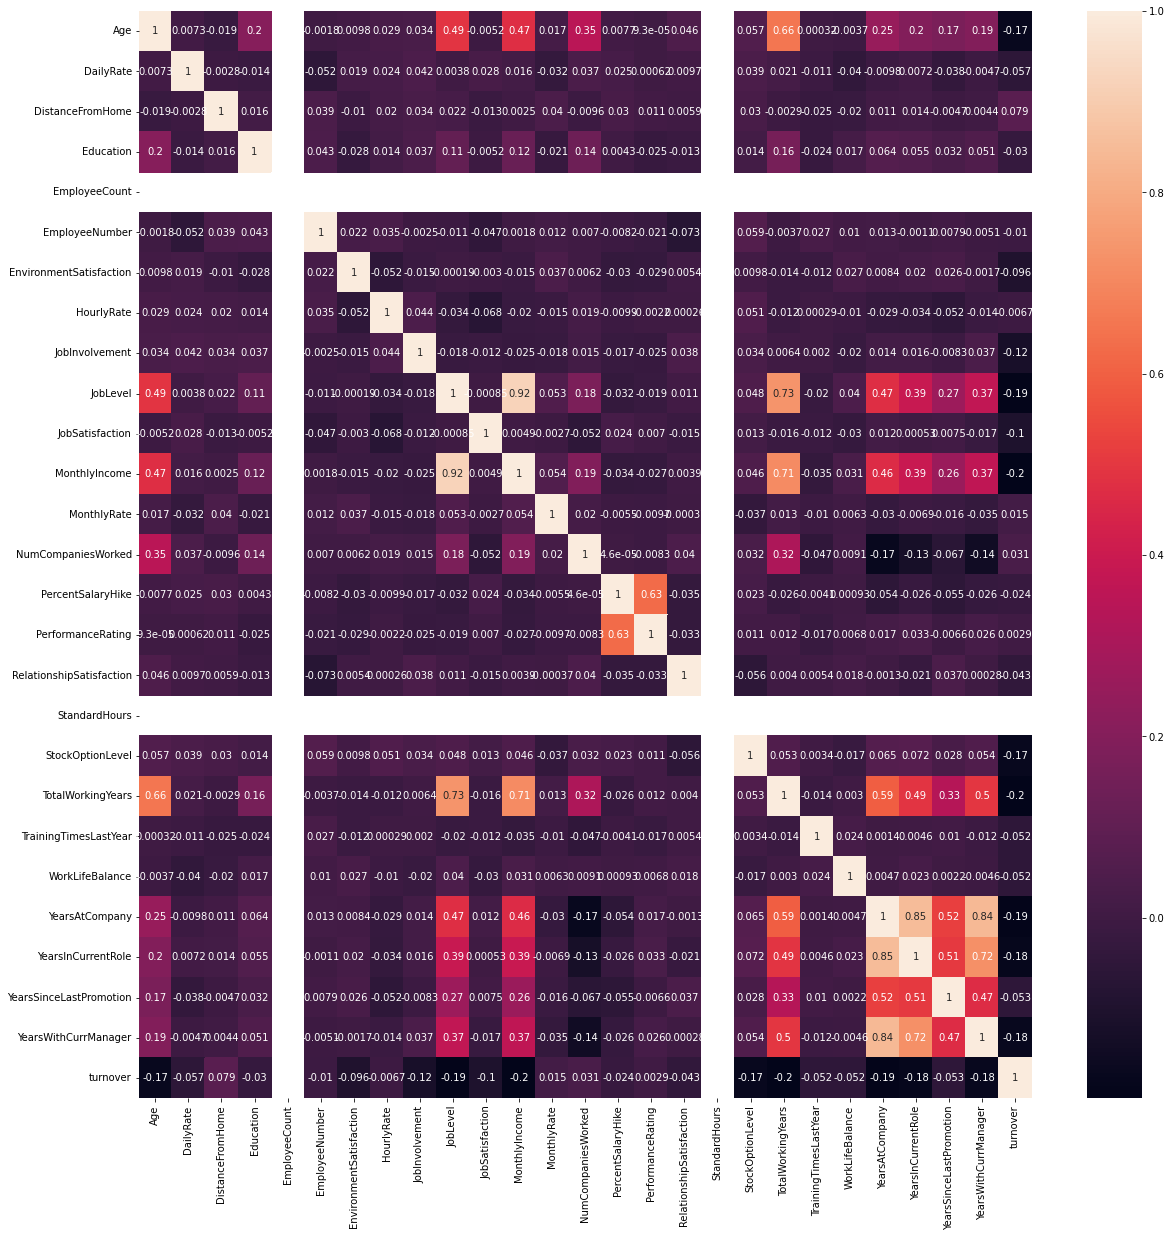

In [ ]:
corr = df.corr(method='spearman')
plt.figure(figsize=[20,20])
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Relacionamento Entre Funcionários e Gestores')

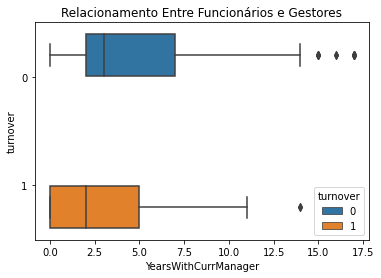

In [ ]:
ax = sns.boxplot(y=df.turnover,x=df.YearsWithCurrManager,data=df,hue=df.turnover,orient="h")
ax.set_title('Relacionamento Entre Funcionários e Gestores')


Text(0.5, 1.0, 'Contagem de Anos Com Mesmo Gestor')

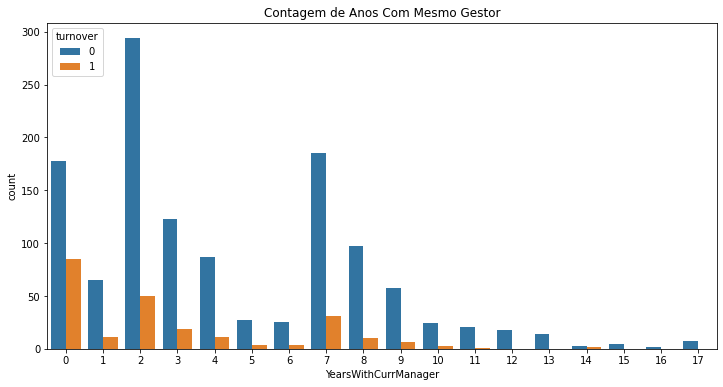

In [ ]:
plt.figure(figsize=[12,6])
ax1 = sns.countplot(x=df.YearsWithCurrManager,hue=df.turnover,data=df)
ax1.set_title("Contagem de Anos Com Mesmo Gestor")

O boxplot mostra que a mediana dos anos com o mesmo gestor para pessoas que não saíram da empresa é maior do que para aquelas que saíram. Outro ponto que pode destacar é que existe uma frequencia de funcionarios que sai da empresas com relação ao tempo que atua com o gestor, os picos estão nos funcionários com menos de um ano, depois aparece nos intervalos de 1-3 anos tendo o apogeu no segundo ano e voltando novamente a ter alta no intervalo de 6-8 anos. Pode-se inferir que nos primeiros anos tem uma maior procura por mudanças ou inovação nas areas de atuação diminuindo o tempo com o gestor e com isso levando a saida do funcionário, já apos 7 anos na empresa ocupando o mesmo cargo os funcionários tendem a sair dessa zona de estagnação, porem apos esse tempo mostra que tende a se tornar mais comodo com o que faz.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'YearsWithCurrManager')

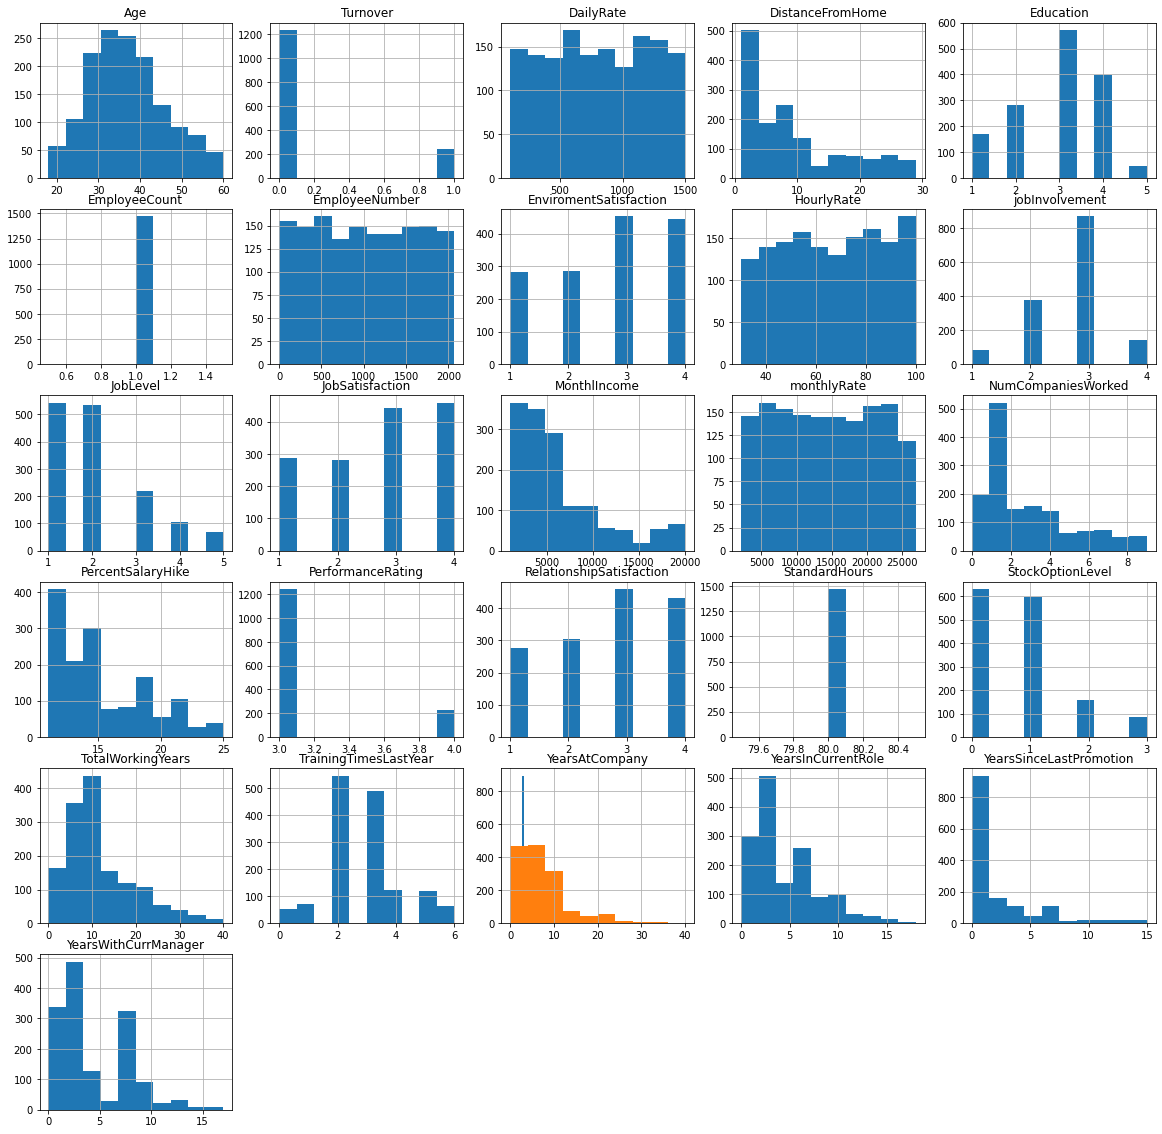

In [ ]:

plt.figure(figsize=[20,20])
plt.subplot(6,5,1)
plt.grid(visible=True)
plt.hist(x=df.Age)
plt.title('Age')

plt.subplot(6,5,2)
plt.grid(visible=True)
plt.hist(x=df.turnover)
plt.title('Turnover')

plt.subplot(6,5,3)
plt.grid(visible=True)
plt.hist(x=df.DailyRate)
plt.title('DailyRate')

plt.subplot(6,5,4)
plt.grid(visible=True)
plt.hist(x=df.DistanceFromHome)
plt.title('DistanceFromHome')

plt.subplot(6,5,5)
plt.grid(visible=True)
plt.hist(x=df.Education)
plt.title('Education')

plt.subplot(6,5,6)
plt.grid(visible=True)
plt.hist(x=df.EmployeeCount)
plt.title('EmployeeCount')

plt.subplot(6,5,7)
plt.grid(visible=True)
plt.hist(x=df.EmployeeNumber)
plt.title('EmployeeNumber')

plt.subplot(6,5,8)
plt.grid(visible=True)
plt.hist(x=df.EnvironmentSatisfaction)
plt.title('EnviromentSatisfaction')

plt.subplot(6,5,9)
plt.grid(visible=True)
plt.hist(x=df.HourlyRate)
plt.title('HourlyRate')

plt.subplot(6,5,10)
plt.grid(visible=True)
plt.hist(x=df.JobInvolvement)
plt.title('jobInvolvement')

plt.subplot(6,5,11)
plt.grid(visible=True)
plt.hist(x=df.JobLevel)
plt.title('JobLevel')

plt.subplot(6,5,12)
plt.grid(visible=True)
plt.hist(x=df.JobSatisfaction)
plt.title('JobSatisfaction')

plt.subplot(6,5,13)
plt.grid(visible=True)
plt.hist(x=df.MonthlyIncome)
plt.title('MonthlIncome')

plt.subplot(6,5,14)
plt.grid(visible=True)
plt.hist(x=df.MonthlyRate)
plt.title('monthlyRate')

plt.subplot(6,5,15)
plt.grid(visible=True)
plt.hist(x=df.NumCompaniesWorked)
plt.title('NumCompaniesWorked')

plt.subplot(6,5,16)
plt.grid(visible=True)
plt.hist(x=df.PercentSalaryHike)
plt.title('PercentSalaryHike')

plt.subplot(6,5,17)
plt.grid(visible=True)
plt.hist(x=df.PerformanceRating)
plt.title('PerformanceRating')

plt.subplot(6,5,18)
plt.grid(visible=True)
plt.hist(x=df.RelationshipSatisfaction)
plt.title('RelationshipSatisfaction')

plt.subplot(6,5,19)
plt.grid(visible=True)
plt.hist(x=df.StandardHours)
plt.title('StandardHours')

plt.subplot(6,5,20)
plt.grid(visible=True)
plt.hist(x=df.StockOptionLevel)
plt.title('StockOptionLevel')

plt.subplot(6,5,21)
plt.grid(visible=True)
plt.hist(x=df.TotalWorkingYears)
plt.title('TotalWorkingYears')

plt.subplot(6,5,22)
plt.grid(visible=True)
plt.hist(x=df.TrainingTimesLastYear)
plt.title('TrainingTimesLastYear')

plt.subplot(6,5,23)
plt.grid(visible=True)
plt.hist(x=df.WorkLifeBalance)
plt.title('WorkLifeBalance')

plt.subplot(6,5,23)
plt.grid(visible=True)
plt.hist(x=df.YearsAtCompany)
plt.title('YearsAtCompany')

plt.subplot(6,5,24)
plt.grid(visible=True)
plt.hist(x=df.YearsInCurrentRole)
plt.title('YearsInCurrentRole')

plt.subplot(6,5,25)
plt.grid(visible=True)
plt.hist(x=df.YearsSinceLastPromotion)
plt.title('YearsSinceLastPromotion')

plt.subplot(6,5,26)
plt.grid(visible=True)
plt.hist(x=df.YearsWithCurrManager)
plt.title('YearsWithCurrManager')



Uma analise de todas as variaveis numericas do grupo de dados, ela servirar como metrica para tomada de decisão sobre quais variaveis remover na criaçao do modelo, exemplo a variavel EmployeeCount e Standarhours que não se altera para ambos os grupos. 

##Exercicio 2. (1 ponto)

Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

In [ ]:
# Seleção de variaveis mais importantes pelo modelo Random Forest
from sklearn.feature_selection import RFE

seletor = RFE(rf,n_features_to_select=8,step=1)
seletor = seletor.fit(X,y)
seletor.get_feature_names_out()


array(['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype=object)

As variaveis escolhidas pelo modelo Random Forest foram:
 - Age
 - DailyRate
 - DistanceFromHome
 - MonthlyIncome
 - MonthlyRate
 - OverTime
 - TotalWorkingYears
 - YearsAtCompany

Entre essas variaveis aparecem algumas que foi apresentada na analise exploratoria, são elas:

- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany

In [ ]:
# Seleção de variaveis mais importantes pelo modelo Arvore de Decisão
seletor_dt = RFE(dt,n_features_to_select=8,step=1)
seletor_dt = seletor_dt.fit(X,y)
seletor_dt.get_feature_names_out()

array(['Age', 'HourlyRate', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsWithCurrManager'], dtype=object)

s variaveis escolhidas pelo modelo Decission Tree Classifier foram:
 - Age
 - HourlyRate
 - MonthlyIncome
 - NumCompaniesWorked
 - OverTime
 - TotalWorkingYears
 - StockOptionLevel

Entre essas variaveis aparecem algumas que foi apresentada na analise exploratoria, são elas:

- MonthlyIncome
- TotalWorkingYears
- StockOptionLevel

##Exercicio 3. (2 pontos)

Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['turnover','Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18'],axis=1)
y = df.turnover

X['OverTime'] = X['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)

X_std = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=10)

dt = DecisionTreeClassifier(max_depth=6,random_state=10).fit(X_train,y_train)
score = cross_val_score(dt,X,y,cv=5)
y_pred = dt.predict(X_test)

print(f"Acuracia: {accuracy_score(y_test,y_pred)}")
print(f"Precisão: {precision_score(y_test,y_pred,average='macro')}")
print(f"Sensitividade: {recall_score(y_test,y_pred,average='macro')}")
print(f"Acuracia com Cross Validation: {score.mean()} +/- {score.std()}")



Acuracia: 0.8208616780045351
Precisão: 0.7027086170005835
Sensitividade: 0.6390056022408963
Acuracia com Cross Validation: 0.8095238095238095 +/- 0.020856747913953616


In [ ]:
rf = RandomForestClassifier(random_state=10,max_depth=6).fit(X_train,y_train)
y_pred_random_forest = rf.predict(X_test)
score_rf = cross_val_score(rf,X,y,cv=5)

print(f"Acuracia: {accuracy_score(y_test,y_pred_random_forest)}")
print(f"Precisão: {precision_score(y_test,y_pred_random_forest,average='macro')}")
print(f"Sensitividade: {recall_score(y_test,y_pred_random_forest,average='macro')}")
print(f"Acuracia com Cross Validation: {score_rf.mean()} +/- {score_rf.std()}")



Acuracia: 0.8208616780045351
Precisão: 0.7997685185185186
Sensitividade: 0.5388655462184874
Acuracia com Cross Validation: 0.8578231292517007 +/- 0.008441954861218251


##Exercicio 4. (1 ponto)

Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?


In [ ]:
plt.figure(figsize=[500,200])
plot_tree(dt,feature_names=df.columns,filled=True,class_names=str(df.turnover),max_depth=4)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

O GINI é um critério utilizado na arvore de decisão para classificar seus nós, consiste em classificar a impureza de cada nó variando entre 0.0 e 1.0 onde 0 é totalmente puro e 1 totalmente impuro, dividindo em outros dois sub-nós, desta forma o GINI é muito eficaz para classificar variaveis categoricas objetivas (SIM ou NÃO) mas por outro lado ruim para metas continuas como por exemplo prever preços de casas ou aumento da inflação.

##Exercicio 5. (3 pontos)

Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?

Entre os modelos estudados (Bagging e Boosting) o que apresenta uma maior chance de superajuste é o AdaBoost pelo fato dele ir se ajustando suas hipoteses conforme os erros de acertos na classificação, ou seja, caso o algoritmo de aprenzidado usado tiver uma aprendizagem fraca (erros de classificação na base de treino) então ele fornecerá uma hipotese perfeita.

##Exercicio 6. (1 ponto)

Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?

Sim eu recomendaria, os modelos apresentaram um indice maior de 80% para classificar os grupos que ficam ou saem da empresa, ou seja, houve um acerto de 8 para cada 10 analisados, tambem explicaria que um modelo 100% é um problema pq seria impossivel de acontecer, tendo em vista que o modelo trabalha com base em amostragens, e um indice de 100% para o modelo atual seria um superajuste para prediser a amostra estudada e que isso não coincidiria com a realidade caso seja aplicada em um outro grupo amostral. Concluindo que para um modelo alcançar a marca da perfeição com 100% precisaria dos dados de todos os funcionários mundiais.